In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcdefaults()
plt.rcParams.update(
  {"font.size": 11, 
   "grid.alpha": 0.3}
)

In [3]:
def plot_line_prediction(fig, axes, y, y_aggregate, year, ylim):

  x = np.arange(1, 13)
  y_predict_agg_arr = np.ones_like(x, dtype=float) * np.inf

  for i in range(3, 13):
    coef = np.polyfit(x[:i], y[:i], 1)
    poly1d_fn = np.poly1d(coef) 
    # poly1d_fn is now a function which takes in x and returns an estimate for y

    # take the coefficients of poly1d_fn
    m, c = poly1d_fn.coef

    y_predict_agg_arr[i-1] = m*12 + c   # predict at the end of the month

    j = i-3
    axes[j//2, j%2].plot(x, poly1d_fn(x), '-', linewidth=1, alpha=0.7, label=f"{i}") #'--k'=black dashed line, 'yo' = yellow circle marker

    axes[j//2, j%2].plot(x[:i], y[:i], 'o', markerfacecolor="white", markeredgecolor="k", zorder=99)
    axes[j//2, j%2].plot(x, y_aggregate*np.ones_like(x), 'k', linewidth=1)

    axes[j//2, j%2].set_xlim(0.5, 12.5)
    axes[j//2, j%2].set_ylim(ylim)
    axes[j//2, j%2].set_title(f"Fitting dengan {i} bulan pertama \ndi tahun {year}")
    axes[j//2, j%2].set_xlabel("bulan ke-n")
    axes[j//2, j%2].set_ylabel("positif sentimen (%)")

    # axes[j%5, j//5].grid("on")
    # axes[j%5, j//5].legend(loc="upper left", bbox_to_anchor=[1.01, 1], borderaxespad=0)
    axes[j//2, j%2].text(2, y_aggregate+0.5, f"agg: {y_aggregate}", verticalalignment="bottom")

  plt.subplots_adjust(hspace=0.5)
  plt.show(fig)

  abs_err = np.ones_like(y_predict_agg_arr, dtype=float) * np.inf
  abs_err[2:] = np.abs(y_predict_agg_arr[2:] - y_aggregate)
  estimated_month = np.argmin(abs_err) + 1

  return abs_err, estimated_month

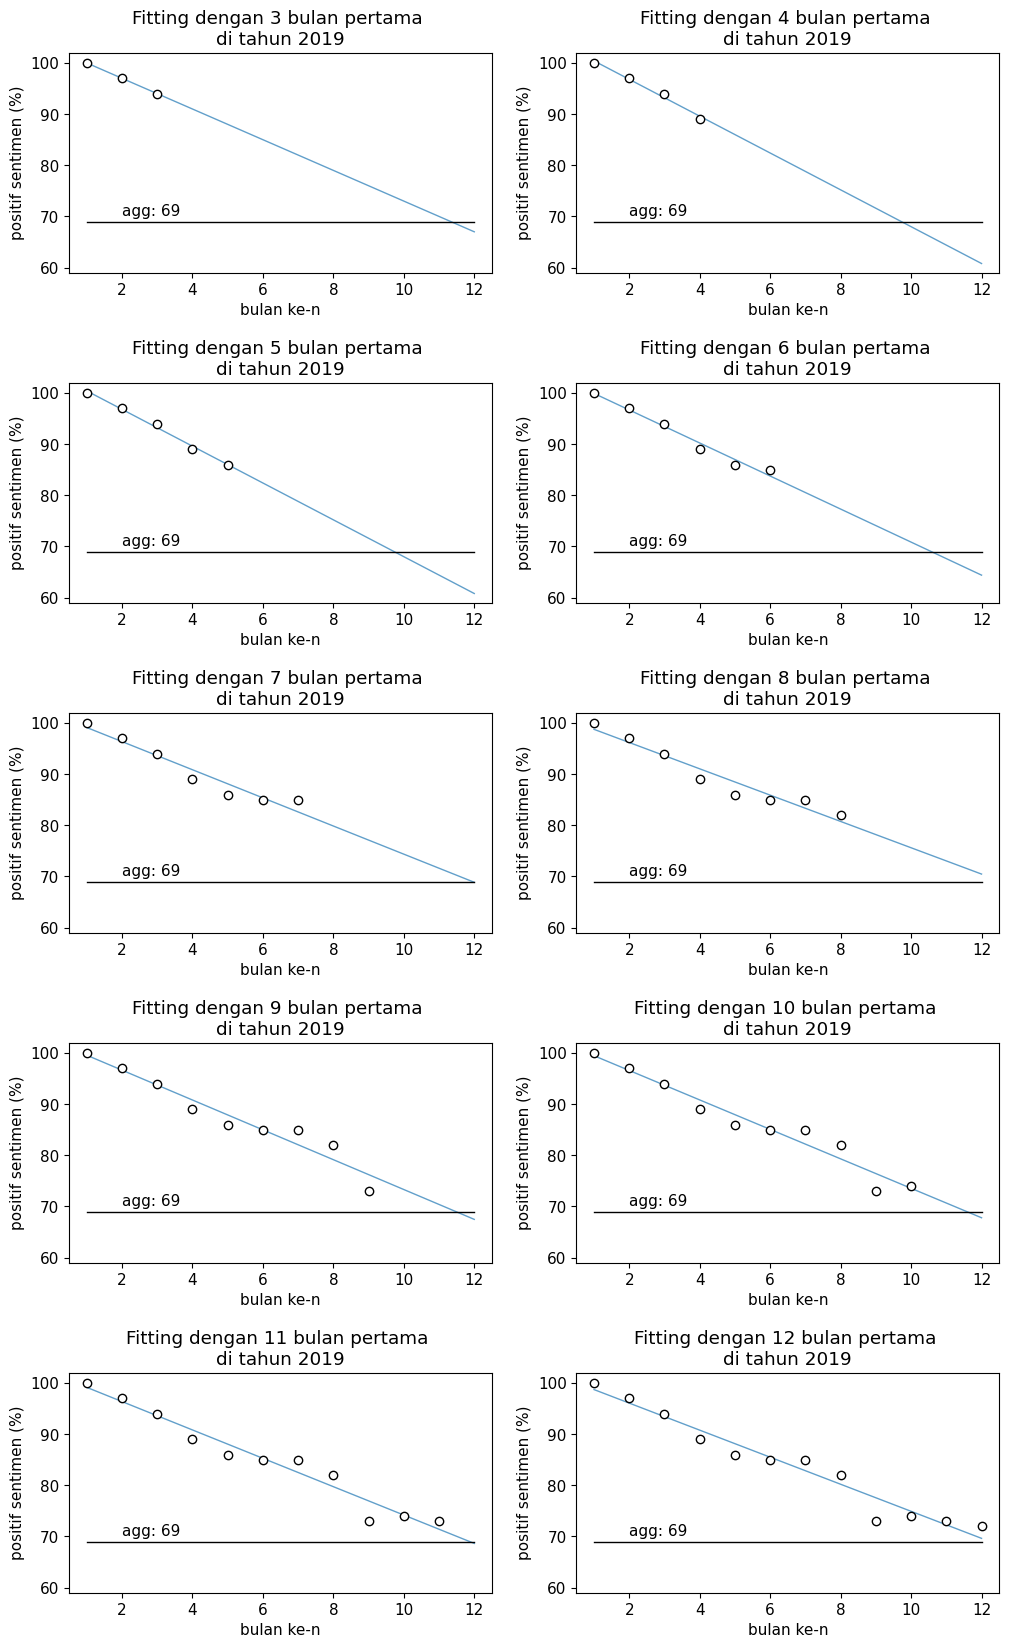

(array([       inf,        inf, 2.        , 8.2       , 8.2       ,
        4.60952381, 0.14285714, 1.46428571, 1.52777778, 1.21212121,
        0.36363636, 0.62820513]),
 7)

In [4]:
year = 2019
y = [100, 97, 94, 89, 86, 85, 85, 82, 73, 74, 73, 72]
y_aggregate = 69

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(12, 20))
plot_line_prediction(fig, axes, y, y_aggregate, year, ylim=[59, 102])

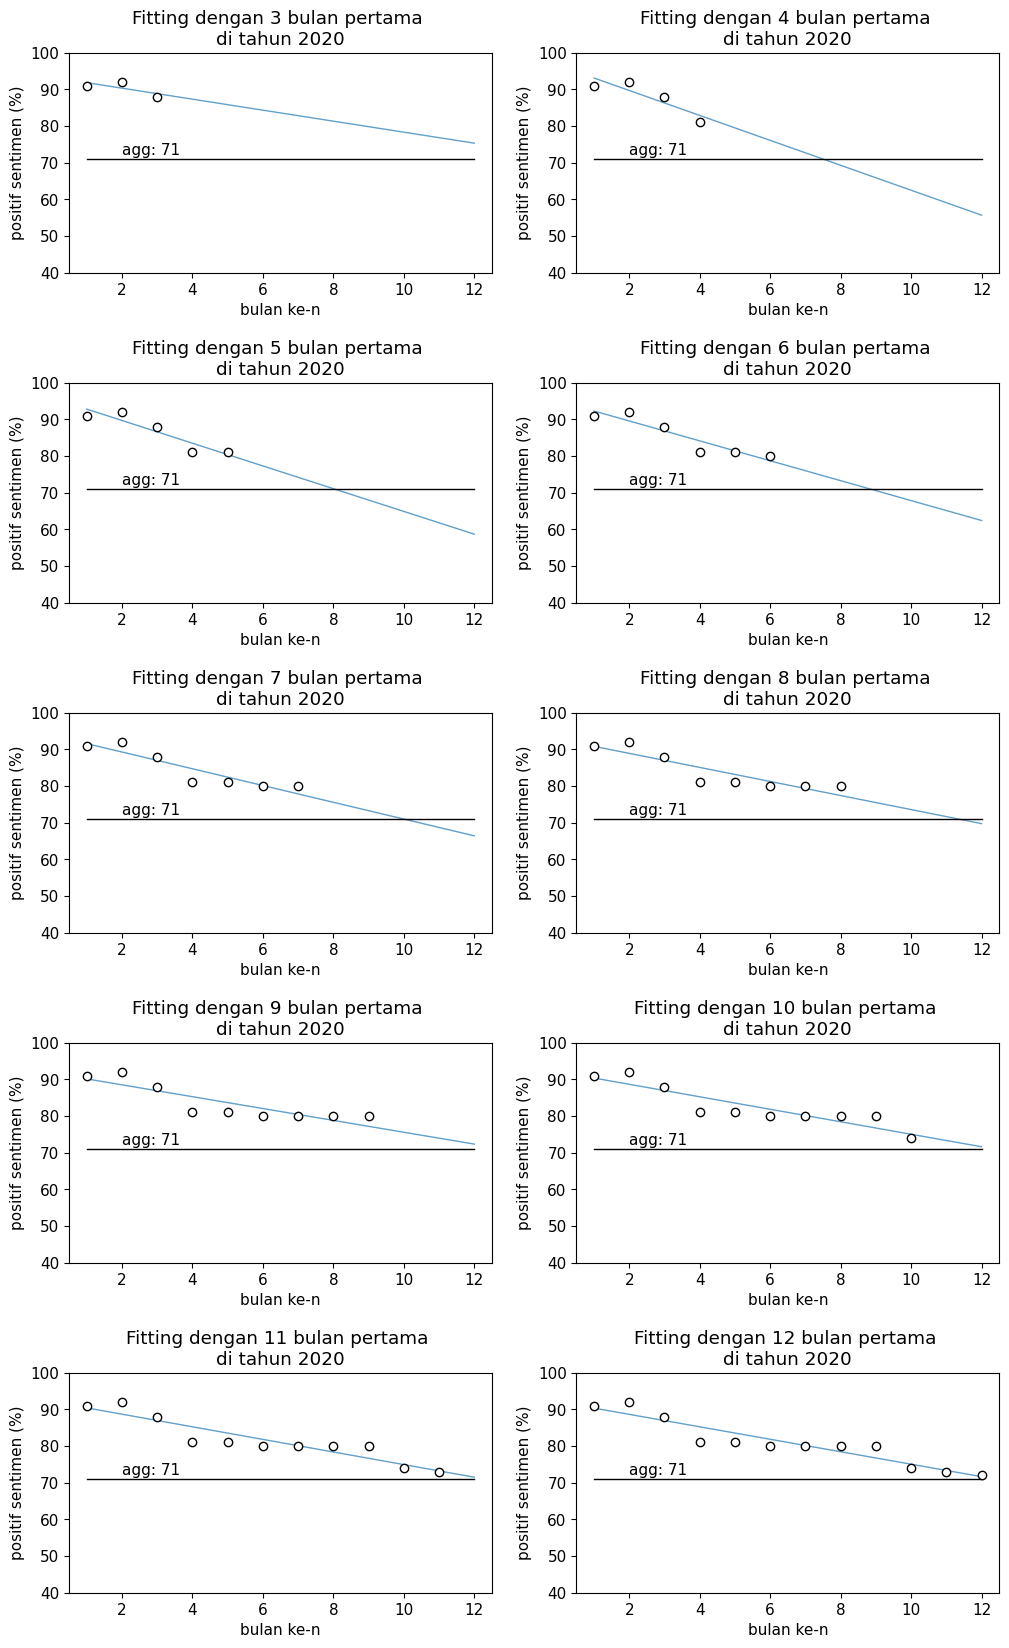

(array([        inf,         inf,  4.33333333, 15.3       , 12.3       ,
         8.57142857,  4.57142857,  1.25      ,  1.35      ,  0.63030303,
         0.50909091,  0.65384615]),
 11)

In [6]:
year = 2020
y = [91, 92, 88, 81, 81, 80, 80, 80, 80, 74, 73, 72] # 10, not 9, so the fit isn't perfect
y_aggregate = 71

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(12, 20))
plot_line_prediction(fig, axes, y, y_aggregate, year, ylim=[40, 100])

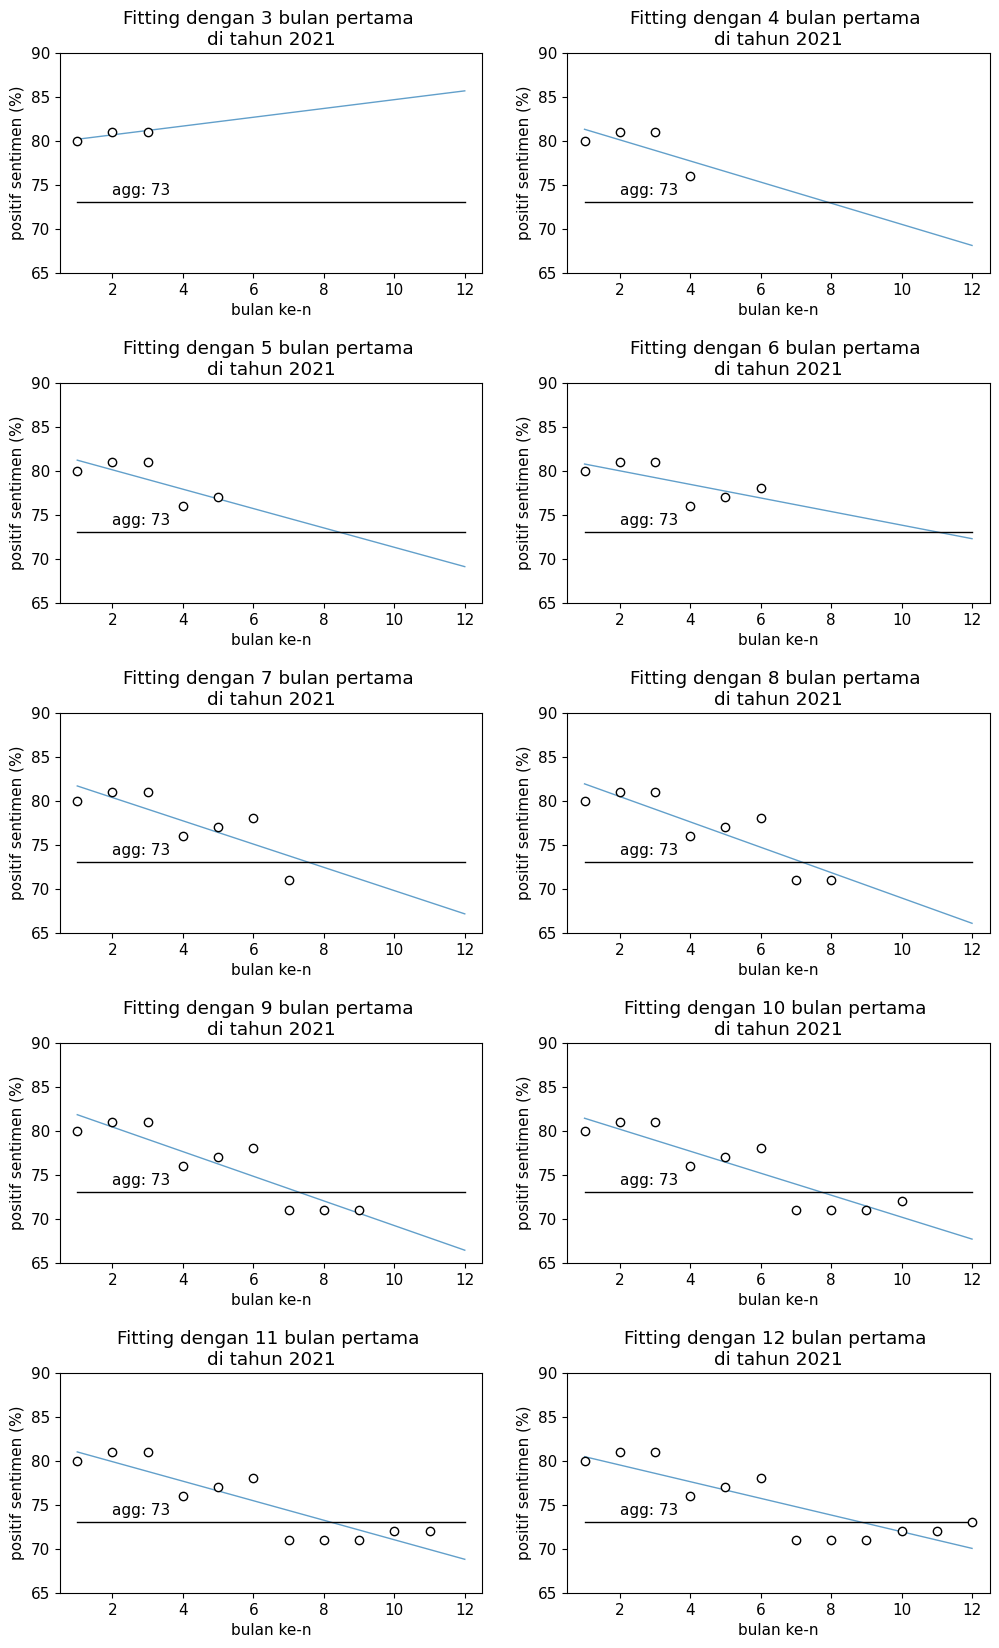

(array([        inf,         inf, 12.66666667,  4.9       ,  3.9       ,
         0.72380952,  5.85714286,  6.92857143,  6.57777778,  5.31515152,
         4.2       ,  2.96153846]),
 6)

In [5]:
year = 2021
y = [80, 81, 81, 76, 77, 78, 71, 71, 71, 72, 72, 73] # 10, not 9, so the fit isn't perfect
y_aggregate = 73

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(12, 20))
plot_line_prediction(fig, axes, y, y_aggregate, year, ylim=[65, 90])